# Cleaning all the data

((Explicar lo que hacemos en este Notebook))

First of all we import the libraries needed

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast
import collections
import seaborn as sns
from functools import reduce
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')

## Load the data

In [2]:
# The reason you get this low_memory warning is because guessing dtypes for each column is very memory demanding. 
# Pandas tries to determine what dtype to set by analyzing the data in each column

df_metadata = pd.read_csv("the_movies_dataset/movies_metadata.csv", low_memory = False)
df_credits = pd.read_csv("the_movies_dataset/credits.csv", low_memory = False)
df_keywords = pd.read_csv("the_movies_dataset/keywords.csv", low_memory = False)

In [3]:
print(df_metadata["id"].dtype)
print(df_credits["id"].dtype)
print(df_keywords["id"].dtype)

object
int64
int64


Before merge the data frames we need to tranform the id column of the df_metadata into int

In [4]:
df_metadata["id"] = pd.to_numeric(df_metadata["id"], errors = "coerce", downcast = "integer")

In [5]:
print(df_metadata["id"].dtype)
print(df_credits["id"].dtype)
print(df_keywords["id"].dtype)

float64
int64
int64


## Merge the Data Frames

In [6]:
df = reduce(lambda df_left, df_right: pd.merge(df_left, df_right, on = ["id"]), [df_metadata, df_credits, df_keywords])

In [7]:
df.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


## First look to the Data Frame

In [8]:
print(df.shape)
print(df.columns)

(46628, 27)
Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew', 'keywords'],
      dtype='object')


#### Features

* **adult**: Indicates if the movie is X-Rated or Adult.
* **belongs_to_collection**: A stringifield dictionary that gives information on the movie series the particular film belongs to.
* **budget**: The budget of the movie in dollars.
* **genres**: A stringifield list of dictionaries that list out all the genres associated with the movie.
* **homepage**: The Official Homepage of the move.
* **id**: The ID of the movie.
* **imdb_id**: The IMDB ID of the movie.
* **original_language**: The language in which the movie was originally shot in.
* **original_title**: The original title of the movie.
* **overview**: A brief blurb of the movie.
* **popularity**: The Popularity Score assigned by TMDB.
* **poster_path**: The URL of the poster image.
* **production_companies**: A stringifield list of production companies involved with the making of the movie.
* **production_countries**: A stringifield list of countries where the movie was shot/produced in.
* **release_date**: Theatrical Release Date of the movie.
* **revenue**: The total revenue of the movie in dollars.
* **runtime**: The runtime of the movie in minutes.
* **spoken_languages**: A stringifield list of spoken languages in the film.
* **status**: The status of the movie (Released, To Be Released, Announced, etc.)
* **tagline**: The tagline of the movie.
* **title**: The Official Title of the movie.
* **video**: Indicates if there is a video present of the movie with TMDB.
* **vote_average**: The average rating of the movie.
* **vote_count**: The number of votes by users, as counted by TMDB.
* **cast**: A stringfield list of the cast of the movie.
* **crew**: A stringfield list of the crew of the movie.
* **keywords**: A stringfield list of keywords related to the movie.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46628 entries, 0 to 46627
Data columns (total 27 columns):
adult                    46628 non-null object
belongs_to_collection    4574 non-null object
budget                   46628 non-null object
genres                   46628 non-null object
homepage                 8009 non-null object
id                       46628 non-null object
imdb_id                  46611 non-null object
original_language        46617 non-null object
original_title           46628 non-null object
overview                 45633 non-null object
popularity               46624 non-null object
poster_path              46229 non-null object
production_companies     46624 non-null object
production_countries     46624 non-null object
release_date             46540 non-null object
revenue                  46624 non-null float64
runtime                  46360 non-null float64
spoken_languages         46624 non-null object
status                   46542 non-null objec

In [10]:
df.isnull().sum()

adult                        0
belongs_to_collection    42054
budget                       0
genres                       0
homepage                 38619
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   995
popularity                   4
poster_path                399
production_companies         4
production_countries         4
release_date                88
revenue                      4
runtime                    268
spoken_languages             4
status                      86
tagline                  25845
title                        4
video                        4
vote_average                 4
vote_count                   4
cast                         0
crew                         0
keywords                     0
dtype: int64

Apparently, seems like there are no null, but let's take a deeper look at each column.

In [11]:
df[df.columns].dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
cast                      object
crew                      object
keywords                  object
dtype: object

* Budget should be numeric
* Belongs_to_collection should be bool

## Cleaning

### 0. Drop irrelevant info

Before continue analyzing, we should take a quick glance at the "apparently irrelevant" columns to decide if we drop them. This is not big data, but it could help with processing time.

- Adult
- Homepage
- Id, Imdbid (Not useful to the model)
- Status
- Original Title (won't affect the model)
- Overview
- Popularity
- Poster path (Not relevant)
- Tagline (Not relevant)
- Video (Not relevant)
- Vote_average
- Vote_count

In [12]:
df["adult"][df["revenue"] != 0].describe()

count      7541
unique        1
top       False
freq       7541
Name: adult, dtype: object

All the movies with revenue data are not Adult, this variable is not relevant.

In [13]:
df["homepage"].head(3)

0    http://toystory.disney.com/toy-story
1                                     NaN
2                                     NaN
Name: homepage, dtype: object

In [14]:
df["homepage"] = df["homepage"].apply(lambda x: "yes" if x is not np.nan else "no")

In [15]:
df[df["revenue"] != 0].groupby("homepage")["revenue"].describe()

,count,mean,std,min,25%,50%,75%,max
homepage,,,,,,,,
no,5127.0,4.279317e+07,7.923566e+07,1.0,1966723.00,12729917.0,4.435071e+07,8.766885e+08
yes,2410.0,1.223039e+08,2.211865e+08,1.0,3771742.75,35455217.0,1.322509e+08,2.787965e+09


In [16]:
df[df["revenue"] != 0].groupby("status")["revenue"].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
Post Production,5.0,7.159479e+06,9.860135e+06,90425.0,841733.00,1066471.0,10893246.00,2.290552e+07
Released,7524.0,6.832604e+07,1.459957e+08,1.0,2341010.25,16664814.5,66532939.00,2.787965e+09
Rumored,6.0,5.325868e+06,8.107588e+06,60.0,195025.00,251322.0,10131979.25,1.785071e+07


Most of the movies with revenue data are in Released status. This information is not relevant.

In [17]:
df["overview"].head(3)

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
Name: overview, dtype: object

In [18]:
df["overview"][0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."

It could be cool to analyze via NLP, but there's not enough info and not all movies have an overview

In [19]:
df["popularity"].head(3)

0    21.946943
1    17.015539
2      11.7129
Name: popularity, dtype: object

We can't use this variable in our model because before a movie is released this information does not exist, besides, we don't know how this value it is taken.

In [20]:
df["poster_path"].head(3)

0    /rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1    /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2    /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
Name: poster_path, dtype: object

In [21]:
df["tagline"].head(3)

0                                                  NaN
1            Roll the dice and unleash the excitement!
2    Still Yelling. Still Fighting. Still Ready for...
Name: tagline, dtype: object

In [22]:
df["video"].sample(3)

31199    False
23144    False
2396     False
Name: video, dtype: object

In [23]:
df["vote_average"].head()

0    7.7
1    6.9
2    6.5
3    6.1
4    5.7
Name: vote_average, dtype: float64

In [24]:
df["vote_count"].head()

0    5415.0
1    2413.0
2      92.0
3      34.0
4     173.0
Name: vote_count, dtype: float64

Vote average and vote count can't be use in the model because before a movie is released we don't know this information.

In [25]:
df = df.drop(["adult" ,"id", "imdb_id", "overview", "popularity" ,"poster_path", "tagline", "homepage",  
              "status", "original_title", "video", "vote_average", "vote_count", ], axis = 1)

In [26]:
df.head(3)

,belongs_to_collection,budget,genres,original_language,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,cast,crew,keywords
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


### 1. Revenue

In [27]:
df["revenue"].describe()

count    4.662400e+04
mean     1.102765e+07
std      6.380526e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

In [28]:
df["revenue"].isnull().sum()

4

First thing is first! The whole point to our model is being able to predict a movie revenue, so, this column is essential for this project. That's why the first thing we should do is find out how many movies do we have that actually have a registered value for the revenue. If this value is null, we will have to drop those rows.

As we found out in the previous cell, and also checked at metadata's stats, there are 4 null values in Revenue. Furthermore, we ought to check if we have values worth $0 revenue, because they'd be like null for us.

In [29]:
df[df["revenue"] > 0].shape

(7537, 14)

Out of 46628 movies, there are only 7537 rows with revenue metadata. We are going to change the dataframe containing only the movies with revenue information, since it's essencial for our model.

In [30]:
df = df[df["revenue"] > 0]

In [31]:
print(df.shape)
print(df.columns)

(7537, 14)
Index(['belongs_to_collection', 'budget', 'genres', 'original_language',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'title', 'cast', 'crew',
       'keywords'],
      dtype='object')


In [32]:
print(df["revenue"].describe())
print("-----")
print("There are %d null values in revenue column in this new dataframe" % (df["revenue"].isnull().sum()))

count    7.537000e+03
mean     6.821719e+07
std      1.458936e+08
min      1.000000e+00
25%      2.300000e+06
50%      1.662719e+07
75%      6.613263e+07
max      2.787965e+09
Name: revenue, dtype: float64
-----
There are 0 null values in revenue column in this new dataframe


Now let's check some random values. They seem like reasonable numbers for a movie revenue, don't they?

In [33]:
df["revenue"].sample(10)

6790     156822020.0
9890        299261.0
2961      18653615.0
6938      24941969.0
6101      37799643.0
18795       176669.0
22852        75143.0
12549    266000000.0
3339      16945171.0
2104      57269863.0
Name: revenue, dtype: float64

### 2. Belongs to Collection

In [34]:
df["belongs_to_collection"].head(10)

0     {'id': 10194, 'name': 'Toy Story Collection', ...
1                                                   NaN
3                                                   NaN
4     {'id': 96871, 'name': 'Father of the Bride Col...
5                                                   NaN
8                                                   NaN
9     {'id': 645, 'name': 'James Bond Collection', '...
10                                                  NaN
12    {'id': 117693, 'name': 'Balto Collection', 'po...
13                                                  NaN
Name: belongs_to_collection, dtype: object

In [35]:
print(df["belongs_to_collection"][0])
print("Type for dicts elements is %s" %(type(df["belongs_to_collection"][0])))

{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}
Type for dicts elements is <class 'str'>


In [36]:
print(df["belongs_to_collection"][1])
print ("Type for NaN elements is %s" %(type(df["belongs_to_collection"][1])))

nan
Type for NaN elements is <class 'float'>


It seems that this column contains 2 different types of values:

* If, indeed, the movie belongs to a series or a collection, the row contains a dict with the Id and the Name of that collection.
* Otherwise, if the movie does not belong to a collection, the value is NaN.

For our model, the valuable information is to know whether a movie belongs to a collection or not, because our assumption is that if it does, the expected revenue could be higher.

For now we take only the name of the collection. And then in the next Notebook we will transform it into a dummie column where 0 means "Doesn't belong to collection" and 1 "Does belong to a collection".

First of all we have to transform this column into a dictionary, because is a string. For this task we build a function because we will use it later.

In [37]:
def to_dict(dataframe, column):
    
    dataframe[column] = dataframe[column].apply(lambda x: np.nan if pd.isnull(x) else ast.literal_eval(x))
    return dataframe

In [38]:
df = to_dict(df, "belongs_to_collection")

In [39]:
df["belongs_to_collection"][0].keys()

dict_keys(['id', 'name', 'poster_path', 'backdrop_path'])

Now, we take the name of the collection

In [40]:
df["belongs_to_collection"] = df["belongs_to_collection"].apply(lambda x: x["name"] if x is not np.nan else x)

In [41]:
df["belongs_to_collection"].head(5)

0              Toy Story Collection
1                               NaN
3                               NaN
4    Father of the Bride Collection
5                               NaN
Name: belongs_to_collection, dtype: object

These are the highest grossing collections

In [42]:
df.groupby("belongs_to_collection")["revenue"].agg(["count", "sum", "mean"]).sort_values(by = "sum", ascending = False).reset_index()[:10]

,belongs_to_collection,count,sum,mean
0,Harry Potter Collection,8,7.707367e+09,9.634209e+08
1,Star Wars Collection,8,7.434495e+09,9.293118e+08
2,James Bond Collection,26,7.106970e+09,2.733450e+08
3,The Fast and the Furious Collection,8,5.125099e+09,6.406373e+08
4,Pirates of the Caribbean Collection,5,4.521577e+09,9.043154e+08
5,Transformers Collection,5,4.366101e+09,8.732202e+08
6,Despicable Me Collection,4,3.691070e+09,9.227676e+08
7,The Twilight Collection,5,3.342107e+09,6.684215e+08
8,Ice Age Collection,5,3.216709e+09,6.433417e+08
9,Jurassic Park Collection,4,3.031484e+09,7.578710e+08


Taking into account the average gross

In [43]:
df.groupby("belongs_to_collection")["revenue"].agg(["count", "sum", "mean"]).sort_values(by = "mean", ascending = False).reset_index()[:10]

,belongs_to_collection,count,sum,mean
0,Avatar Collection,1,2.787965e+09,2.787965e+09
1,The Avengers Collection,2,2.924962e+09,1.462481e+09
2,Frozen Collection,1,1.274219e+09,1.274219e+09
3,Finding Nemo Collection,2,1.968906e+09,9.844532e+08
4,The Hobbit Collection,3,2.935523e+09,9.785078e+08
5,The Lord of the Rings Collection,3,2.916545e+09,9.721816e+08
6,Harry Potter Collection,8,7.707367e+09,9.634209e+08
7,Star Wars Collection,8,7.434495e+09,9.293118e+08
8,Despicable Me Collection,4,3.691070e+09,9.227676e+08
9,Pirates of the Caribbean Collection,5,4.521577e+09,9.043154e+08


That the film belongs to a franchise is related to the revenue?

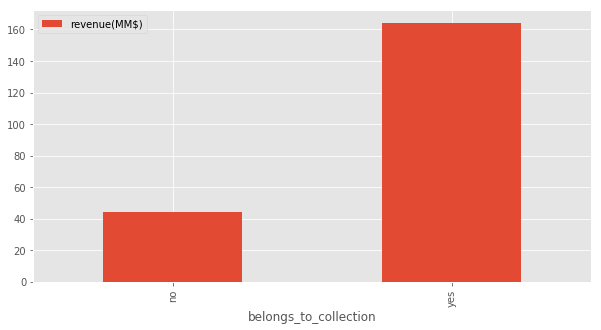

In [45]:
pd.DataFrame(
    {"revenue(MM$)": df["revenue"] / 1e6, 
     "belongs_to_collection": df["belongs_to_collection"].apply(lambda x: "yes" if x is not np.nan else "no")}
).groupby("belongs_to_collection").mean().plot.bar(figsize = (10, 5));

We appreciate that the films that belong to a franchise have more average revenue than the others.

### 3. Budget

First, we transform this column into numeric value

In [46]:
df["budget"] = pd.to_numeric(df["budget"], errors = "coerce")

In [47]:
df["budget"] = df["budget"].replace(0, np.nan)

In [48]:
df["budget"].dtype

dtype('float64')

In [49]:
df["budget"].describe()

count    5.458000e+03
mean     3.098100e+07
std      4.003758e+07
min      1.000000e+00
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

Now we have to analyze, out of the 7537, how many movies contain budget information in order to determine if we can use this variable in our model. As it happened with "Revenue" seems like we have not nulls, but we have false positives, since a 0 budget is null for us and a perfectly "not null" value for Python. This column should be numeric and $0 budget should be Nan.

In [50]:
df["budget"].notnull().sum()

5458

Out of 7537 movies, 5458 have a valid value for budget. Is that enough data for our model? Also, taking a deeper look at the values, seems that most of them are exact and round amounts, and they don't seem very accurate. Should we use this data in our model?

Let's plot a relation between budget and revenue

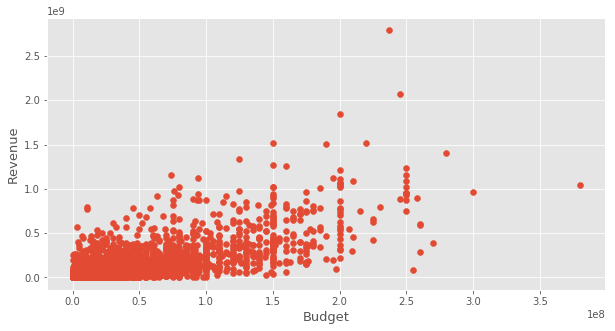

In [51]:
plt.figure(figsize = (10, 5))

fig = plt.scatter(x = df["budget"], y = df["revenue"])

plt.ylabel("Revenue", fontsize = 13)
plt.xlabel("Budget", fontsize = 13)

plt.show()

We can see a relationship between these two variables as expected.

### 4. Genres

In [52]:
df["genres"].sample(5)

30610    [{'id': 12, 'name': 'Adventure'}, {'id': 878, ...
1200     [{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...
37336                        [{'id': 18, 'name': 'Drama'}]
14129                       [{'id': 35, 'name': 'Comedy'}]
3609     [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
Name: genres, dtype: object

In [53]:
print(df["genres"][0])
print(df["genres"][1])
print(df["genres"][235])

[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]
[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]
[{'id': 10749, 'name': 'Romance'}, {'id': 16, 'name': 'Animation'}, {'id': 10751, 'name': 'Family'}, {'id': 35, 'name': 'Comedy'}, {'id': 12, 'name': 'Adventure'}]


Seems that in this column, we can find a list of dicts that indicate the different movie genres associated to each movie. As we can see, there are many different generes associated to each movie, but not always the same ammount of them. First of all, we should find out how many different genres we've got, in order to decide what to do and how to use this information.

Basic questions we should ask ourselves about the column "Genres":

Should we create dummie variables with all the genres?
What's the maxium numbers of genres per movie we want to use in our model
...
Maybe we shoul just keep the id_genre info, and save the dict of (index,genre) outside the main dataframe, just for querys.

First, let's find out how many different genres we have got, and what's the maximum number of genres any of the movies has.

For this task we create a function that transforms the column into a list

In [54]:
def to_list(column, key):
    
    new_column = column.fillna('[]').apply(ast.literal_eval).apply(lambda x: [i[key] for i in x] 
                                                                   if isinstance(x, list) else [])
    
    return new_column

This function takes the values of the key that are in the dictionary. For example, if we want the name of the genre we need to assign key = "name" in the input of the function.

In [55]:
df["genres"] = to_list(df["genres"], "name")

In [56]:
df["genres"].head()

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
3            [Comedy, Drama, Romance]
4                            [Comedy]
5    [Action, Crime, Drama, Thriller]
Name: genres, dtype: object

* Maximum genres in a movie?
* Mean of genres per movie?

In [57]:
stats.describe(np.array(df["genres"].str.len()))

DescribeResult(nobs=7537, minmax=(0, 8), mean=2.5011277696696297, variance=1.2625053627863332, skewness=0.48130236924329367, kurtosis=-0.04560935460086002)

We have movies with no genres, movies with 8 genres and the mean per movie are 2.50.

The number of genres in a movie affects to the revenue?

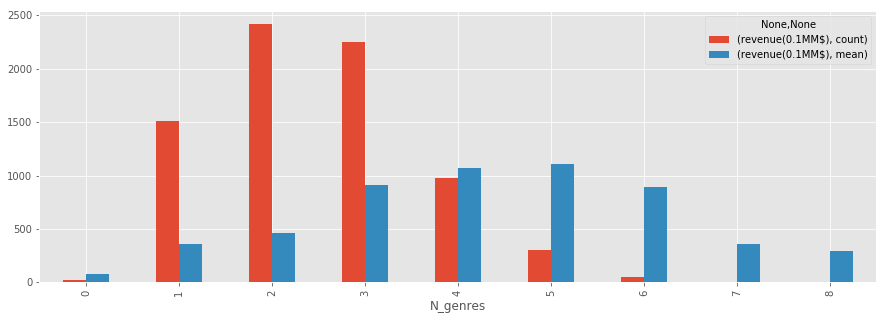

In [58]:
pd.DataFrame(
    {"revenue(0.1MM$)": df["revenue"]/100000,
     "N_genres": [len(x) for x in df["genres"]]}
).groupby("N_genres").agg(["count", "mean"]).plot.bar(figsize = (15, 5));

We see that most of the films have between 1 and 3 genres and it can be seen that the average of the collection increases with the number of genres up to 4-5.

Let's see how many genres we've got just in case we want to create dummie columns for each of them.

For this task we will create a function that returns the list of genres and it's frequency. For the word count we will use the library collections.

In [59]:
def word_count(dataframe, ref_variable):
    values_list = []
    
    for elements_list in dataframe[ref_variable]:
        for value in elements_list:
            values_list.append(value)
    
    return collections.Counter(values_list)

In [60]:
genres_counter = word_count(df, "genres")

In [61]:
print("We have %d unique genres" %(len(genres_counter.keys())))

We have 20 unique genres


Let's see the most common genres in a bar plot

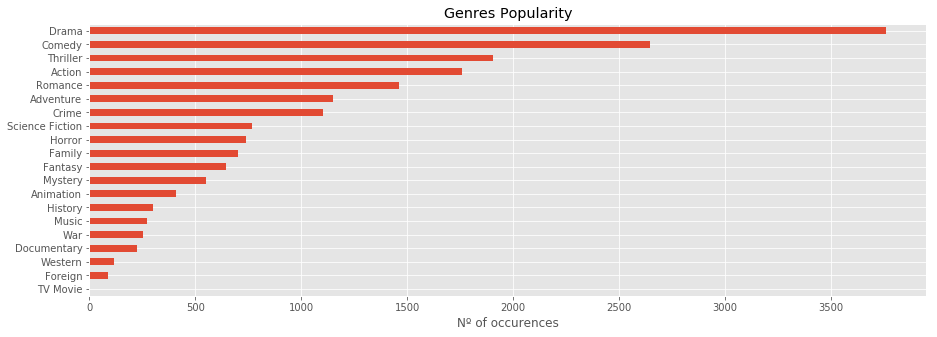

In [62]:
plt.subplots(figsize = (15, 5))

ax = pd.Series(genres_counter).sort_values(ascending = True).plot.barh()
ax.set_xlabel("Nº of occurences")
ax.set_title("Genres Popularity") 

plt.show()

Faltaría hacer un plot con la relación entre género y revenue para comparar qué géneros tienen de media más revenue.

Movies with no genres?

In [63]:
(df["genres"].str.len() == 0).sum()

23

### 5. Original Language

In [64]:
df["original_language"].head(5)

0    en
1    en
3    en
4    en
5    en
Name: original_language, dtype: object

In [65]:
df["original_language"].describe()

count     7537
unique      44
top         en
freq      6428
Name: original_language, dtype: object

Let's see the frequency of the languages and if they are related to the revenue.

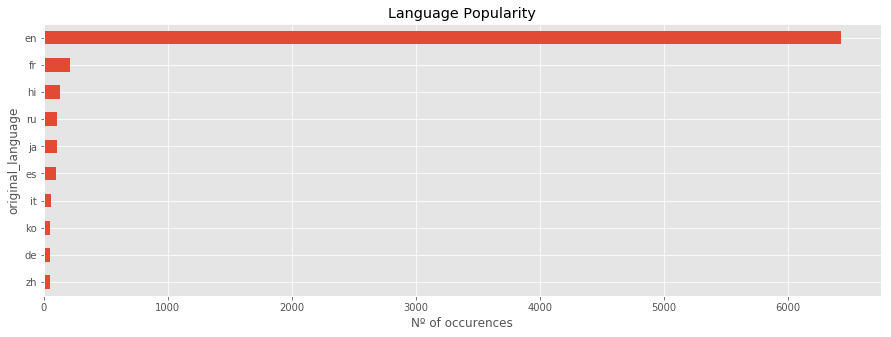

In [66]:
plt.subplots(figsize = (15, 5))

ax = df.groupby("original_language")["revenue"].count().sort_values(ascending = True)[-10:].plot.barh()
ax.set_xlabel("Nº of occurences")
ax.set_title("Language Popularity") 

plt.show()

Most of the films are English so we could do a bar plot in which we see the average collection if the film is English or not.

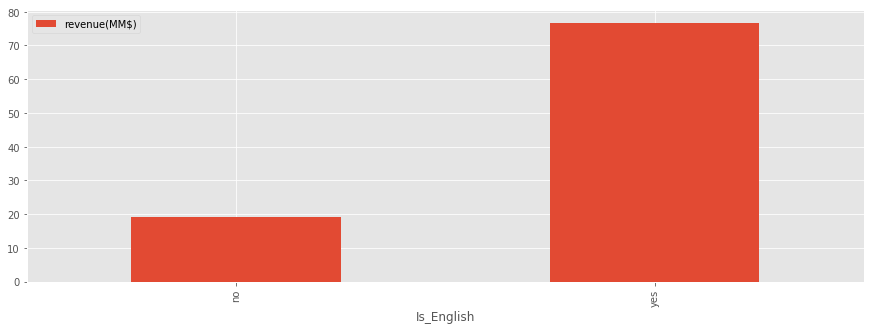

In [68]:
pd.DataFrame(
    {"revenue(MM$)": df["revenue"] / 1e6, 
     "Is_English": df["original_language"].apply(lambda x: "yes" if x == "en" else "no")}
).groupby("Is_English").mean().plot.bar(figsize = (15, 5));

We see that English films are the most frequent and that they have also more average revenue. This leads us to think that we could categorize the films in two groups: English speaking and not.

There are movies with no data in original language?

In [69]:
df["original_language"].isnull().sum()

0

### 6. Production Companies

In [70]:
df["production_companies"].head(5)

0       [{'name': 'Pixar Animation Studios', 'id': 3}]
1    [{'name': 'TriStar Pictures', 'id': 559}, {'na...
3    [{'name': 'Twentieth Century Fox Film Corporat...
4    [{'name': 'Sandollar Productions', 'id': 5842}...
5    [{'name': 'Regency Enterprises', 'id': 508}, {...
Name: production_companies, dtype: object

Same as it happened with genres. Contains a list of dicts.

In [71]:
df["production_companies"] = to_list(df["production_companies"], "name")

In [72]:
df["production_companies"].head()

0                            [Pixar Animation Studios]
1    [TriStar Pictures, Teitler Film, Interscope Co...
3             [Twentieth Century Fox Film Corporation]
4         [Sandollar Productions, Touchstone Pictures]
5    [Regency Enterprises, Forward Pass, Warner Bros.]
Name: production_companies, dtype: object

In [73]:
stats.describe(np.array(df["production_companies"].str.len()))

DescribeResult(nobs=7537, minmax=(0, 26), mean=2.7556056786519836, variance=4.7964206024518257, skewness=2.2842969003470928, kurtosis=10.71322621111153)

We have movies with no production company and movies with 26 production companies. The mean per movie are 2.75 production companies.

The number of production companies affects to the revenue?

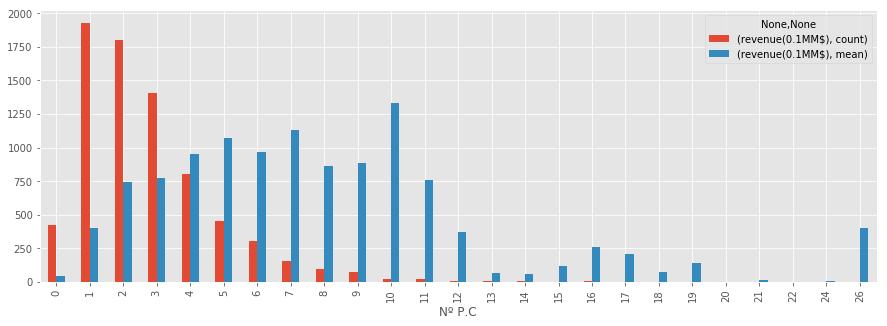

In [74]:
pd.DataFrame(
    {"revenue(0.1MM$)": df["revenue"] / 100000,
     "Nº P.C": [len(x) for x in df["production_companies"]]}
).groupby("Nº P.C").agg(["count", "mean"]).plot.bar(figsize = (15, 5));

Most of the films have between 1 and 7 production companies, and it can be seen that those that are between 4 and 7 usually have more average revenue.

Let's see how many production companies we've got just in case we want to create dummie columns for each of them. Same function as above with genres.

In [75]:
production_companies_counter = word_count(df, "production_companies")

In [76]:
print("There are %d unique production companies" %(len(production_companies_counter.keys())))

There are 7091 unique production companies


What are the most common Production Companies?

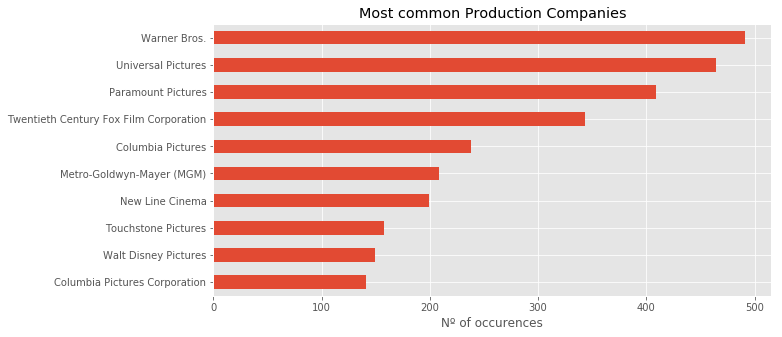

In [77]:
plt.subplots(figsize = (10, 5))

ax = pd.Series(production_companies_counter).sort_values(ascending = True)[-10:].plot.barh()
ax.set_xlabel("Nº of occurences")
ax.set_title("Most common Production Companies") 

plt.show()

What are the production companies that have more average revenue?

Movies with no production companies?

In [78]:
(df["production_companies"].str.len() == 0).sum()

426

### 7. Production Countries

In [79]:
df["production_countries"].sample(5)

1448     [{'iso_3166_1': 'US', 'name': 'United States o...
17629    [{'iso_3166_1': 'US', 'name': 'United States o...
12463    [{'iso_3166_1': 'US', 'name': 'United States o...
2367     [{'iso_3166_1': 'US', 'name': 'United States o...
18488    [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...
Name: production_countries, dtype: object

Almost same as before

In [80]:
df["production_countries"] = to_list(df["production_countries"], "name")

In [81]:
df["production_countries"].head()

0    [United States of America]
1    [United States of America]
3    [United States of America]
4    [United States of America]
5    [United States of America]
Name: production_countries, dtype: object

In [82]:
stats.describe(np.array(df["production_countries"].str.len()))

DescribeResult(nobs=7537, minmax=(0, 12), mean=1.3404537614435452, variance=0.64708010192885668, skewness=2.987479654035032, kurtosis=15.626836710362493)

We have movies with no production country and movies with 12 production countries. The mean per movie are 1.34 production countries.

Let's see if the number of production countries affects to the revenue.

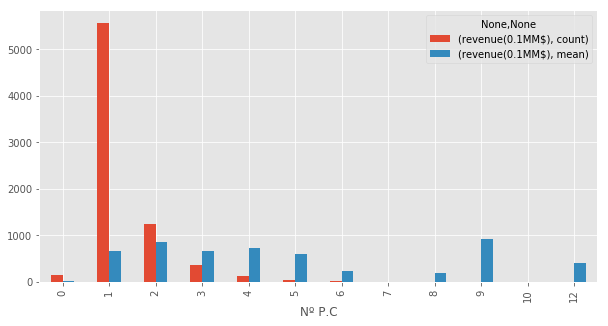

In [83]:
pd.DataFrame(
    {"revenue(0.1MM$)": df["revenue"] / 100000,
     "Nº P.C": [len(x) for x in df["production_countries"]]}
).groupby("Nº P.C").agg(["count", "mean"]).plot.bar(figsize = (10, 5));

We see that most of the films only have 1 production country and that there is not much difference with respect to the revenue.

Movies with no production countries?

In [84]:
(df["production_countries"].str.len() == 0).sum()

156

As this variable is not relevant we eliminate it

In [85]:
df = df.drop(["production_countries"], axis = 1)

### 8. Release Date

Release Date can be a very significant variable in our model since we assume that the movies released nearby certain months or times of the year, can reach more revenue more easily.

In [86]:
print(df["release_date"].sample(5))
print("There are %d null values" % (df["release_date"].isnull().sum()))

4734     2001-10-05
6911     1991-03-08
31736    2011-10-27
17948    2011-09-22
8915     1983-09-16
Name: release_date, dtype: object
There are 1 null values


In [87]:
type(df["release_date"][2255])

str

Info is stored in string format, so we should transform that to Date format, in order to be useful. It is possible that the revenue is related to the year, month and day of the week released.

In [88]:
df["release_date"] = pd.to_datetime(df["release_date"])

In [89]:
df["release_date"].head()

0   1995-10-30
1   1995-12-15
3   1995-12-22
4   1995-02-10
5   1995-12-15
Name: release_date, dtype: datetime64[ns]

Gráficos:
- Evolución de revenue a lo largo de los años
- bar plot de revenue en función del mes
- bar plot de revenue en función del día de la semana

In [90]:
df["release_year"] = df["release_date"].apply(lambda x: x.year)

In [91]:
df["release_month"] = df["release_date"].apply(lambda x: x.month)

In [92]:
df["release_weekday"] = df["release_date"].apply(lambda x: x.dayofweek)

Movies with no release date?

In [ ]:
df["release_date"].isnull().sum()

In [ ]:
df = df.drop(["release_date"], axis = 1)

### 9. Runtime

In [95]:
df["runtime"].sample(5)

1861     109.0
18434    142.0
12322    170.0
21891    100.0
791      149.0
Name: runtime, dtype: float64

In [96]:
df["runtime"].describe()

count    7531.000000
mean      107.743859
std        21.446982
min         0.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

Relation between runtime and revenue?

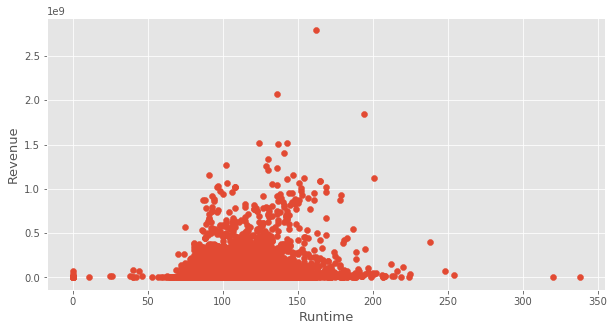

In [97]:
plt.figure(figsize = (10, 5))

fig = plt.scatter(x = df["runtime"], y = df["revenue"])

plt.ylabel("Revenue", fontsize = 13)
plt.xlabel("Runtime", fontsize = 13)

plt.show()

We see that there is not a very strong relationship between these two variables. Most movies have a runtime between 90 and 120 minutes and we see that the collection is very varied.

Movies with no runtime data or zero minutes?

In [98]:
df[(df["runtime"].isnull()) | (df["runtime"] <= 0)].shape

(27, 15)

### 10. Spoken Languages

In [99]:
df["spoken_languages"].sample(5)

5522              [{'iso_639_1': 'en', 'name': 'English'}]
13124             [{'iso_639_1': 'en', 'name': 'English'}]
1393              [{'iso_639_1': 'en', 'name': 'English'}]
6118     [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
2862     [{'iso_639_1': 'it', 'name': 'Italiano'}, {'is...
Name: spoken_languages, dtype: object

Almost same as before

In [100]:
df["spoken_languages"] = to_list(df["spoken_languages"], "name")

In [101]:
df["spoken_languages"].head()

0              [English]
1    [English, Français]
3              [English]
4              [English]
5     [English, Español]
Name: spoken_languages, dtype: object

In [102]:
stats.describe(np.array(df["spoken_languages"].str.len()))

DescribeResult(nobs=7537, minmax=(0, 9), mean=1.4446066074034762, variance=0.79685818187247226, skewness=2.559000640806044, kurtosis=8.894779482272538)

We have movies with no spoken languages and movies with 9. The mean per movie are 1.44.

Let's see if the number of spoken languages affects to the revenue.

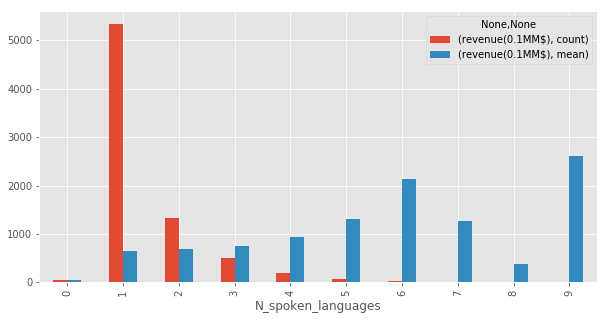

In [103]:
pd.DataFrame(
    {"revenue(0.1MM$)": df["revenue"] / 100000,
     "N_spoken_languages": [len(x) for x in df["spoken_languages"]]}
).groupby("N_spoken_languages").agg(["count", "mean"]).plot.bar(figsize = (10, 5));

We see that most of the films only have 1 spoken language and that there is not much difference with respect to the revenue.

Movies with no production countries?

In [104]:
(df["spoken_languages"].str.len() == 0).sum()

58

As this variable is not relevant we eliminate it

In [105]:
df = df.drop(["spoken_languages"], axis = 1)

### 11. Title

In [106]:
df["title"].sample(5)

2609     My Son the Fanatic
11978           Death Proof
3070               Magnolia
5507        Spaced Invaders
12321                    P2
Name: title, dtype: object

In [107]:
df["title"].isnull().sum()

0

Title data seems to be ok!

### 12. Cast

In [108]:
df["cast"][0][0:1000]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

We can see that the information are lists of dicts. So, as above with genres we tranform it into a list. As we see above we have the following keys per movie:
* cast_id
* character
* credit_id
* gender
* id
* name
* order
* profile_path

Let's see if we need all the cast of the movie, or how affects the cast, the gender and the order of the cast in the revenue of a movie.

In [109]:
df["cast_names"] = to_list(df["cast"], "name")
df["cast_gender"] = to_list(df["cast"], "gender")
df["cast_order"] = to_list(df["cast"], "order")

In [110]:
df = df.reset_index(drop = True)

In [111]:
df.head(3)

,belongs_to_collection,budget,genres,original_language,production_companies,revenue,runtime,title,cast,crew,keywords,release_year,release_month,release_weekday,cast_names,cast_gender,cast_order
0,Toy Story Collection,30000000.0,"[Animation, Comedy, Family]",en,[Pixar Animation Studios],373554033.0,81.0,Toy Story,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",1995.0,10.0,0.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
1,NaN,65000000.0,"[Adventure, Fantasy, Family]",en,"[TriStar Pictures, Teitler Film, Interscope Co...",262797249.0,104.0,Jumanji,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...",1995.0,12.0,4.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,NaN,16000000.0,"[Comedy, Drama, Romance]",en,[Twentieth Century Fox Film Corporation],81452156.0,127.0,Waiting to Exhale,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...",1995.0,12.0,4.0,"[Whitney Houston, Angela Bassett, Loretta Devi...","[1, 1, 1, 1, 2, 2, 2, 2, 2, 2]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]"


Let's see if the number of the cast affects to the revenue.

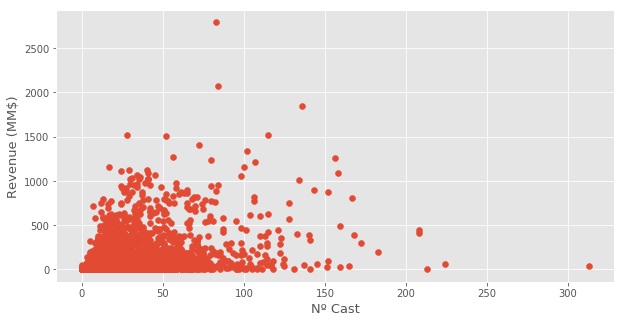

In [112]:
plt.figure(figsize = (10, 5))

fig = plt.scatter(x = df["cast_names"].str.len(), y = df["revenue"]/1e6)

plt.ylabel("Revenue (MM$)", fontsize = 13)
plt.xlabel("Nº Cast", fontsize = 13)

plt.show()

The films that collect more than $ 1000 million do not have a relationship in terms of the amount of the cast.

For films with lower revenue we see that it increases until reaching a cast of approximately 40 actors, and from that value, we see that the revenue tends to decrease.

Does the actor's genre influence? Let's look at the average revenue.
<br>
2 --> Male
<br>
1 --> Female

In [113]:
male_revenue = []
female_revenue = []
for index, gender_list in enumerate(df["cast_gender"]):
    for gender in gender_list:
        if gender == 2:
            male_revenue.append(df.get_value(index, "revenue"))
        elif gender == 1:
            female_revenue.append(df.get_value(index, "revenue"))

In [114]:
print("There are %d actors" %(len(male_revenue)))
print("There are %d actresses" %(len(female_revenue)))

There are 70777 actors
There are 34976 actresses


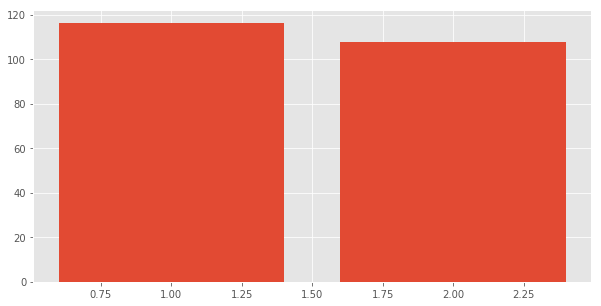

In [115]:
plt.figure(figsize = (10, 5))
plt.bar([1, 2], [np.mean(male_revenue)/1e6, np.mean(female_revenue)/1e6])
plt.show()

We see that the actors have on average a little more revenue than the actresses, but the value is very similar. Where there is a lot of difference is that there are more than double actors than actresses.

Does the order influence? Let's see these same results for the 4 main protagonists of a movie. But first let's check if the cast order column are actually in order.

In [116]:
example = [0, 1, 2, 3, 4, 5, 6]

def is_order(input_list):
    return all(input_list[i] <= input_list[i + 1] for i in range(len(input_list) - 1))
    
is_order(example)

True

In [117]:
df[df["cast_order"].apply(is_order) == False]

,belongs_to_collection,budget,genres,original_language,production_companies,revenue,runtime,title,cast,crew,keywords,release_year,release_month,release_weekday,cast_names,cast_gender,cast_order


Cast are in order, so let's calculate.

In [118]:
male_revenue = []
female_revenue = []
for index, gender_list in enumerate(df["cast_gender"]):
    for gender in gender_list[:3]:
        if gender == 2:
            male_revenue.append(df.get_value(index, "revenue"))
        elif gender == 1:
            female_revenue.append(df.get_value(index, "revenue"))

In [119]:
print("There are %d actors" %(len(male_revenue)))
print("There are %d actresses" %(len(female_revenue)))

There are 13014 actors
There are 7087 actresses


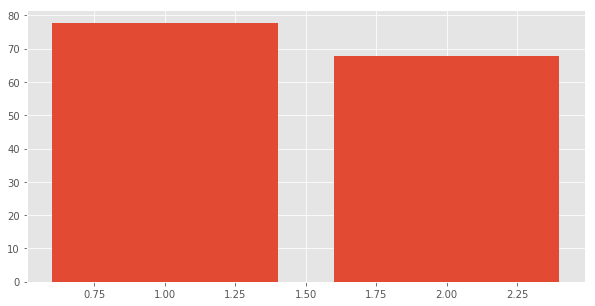

In [120]:
plt.figure(figsize = (10, 5))
plt.bar([1, 2], [np.mean(male_revenue)/1e6, np.mean(female_revenue)/1e6])
plt.show()

We see that there is not much difference in terms of gender if we take the 4 main protagonists.

Only taking into account the protagonist?

In [121]:
male_revenue = []
female_revenue = []
for index, gender_list in enumerate(df["cast_gender"]):
    for gender in gender_list[:1]:
        if gender == 2:
            male_revenue.append(df.get_value(index, "revenue"))
        elif gender == 1:
            female_revenue.append(df.get_value(index, "revenue"))

In [122]:
print("There are %d actors" %(len(male_revenue)))
print("There are %d actresses" %(len(female_revenue)))

There are 5135 actors
There are 1768 actresses


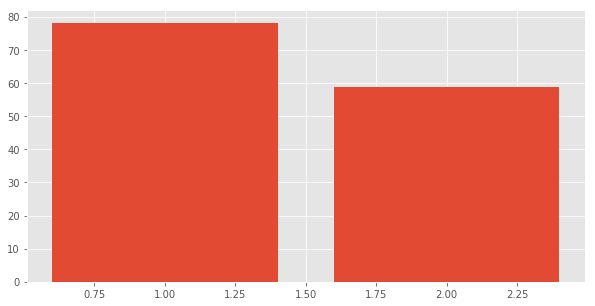

In [123]:
plt.figure(figsize = (10, 5))

plt.bar([1, 2], [np.mean(male_revenue)/1e6, np.mean(female_revenue)/1e6])
plt.show()

Now we see a little more difference. From the outset, there are three times more films with male protagonists than female protagonists. And in addition, the films whose protagonist is a man have an average revenue $ 30 million more than the films starring women.

Who are the actors / actresses with the highest average revenue?

In [124]:
cast_counter = word_count(df, "cast_names")
cast_list = np.array(list(cast_counter.keys()))
cast_list_count = np.array(list(cast_counter.values()))

In [125]:
cast_dict_revenue = {}
for index, artists_list in enumerate(df["cast_names"]):
    for artist in artists_list:
        if artist not in cast_dict_revenue:
            cast_dict_revenue[artist] = df.get_value(index, "revenue")
        else:
            cast_dict_revenue[artist] = cast_dict_revenue[artist] + df.get_value(index, "revenue")   

In [126]:
cast_list_revenue = np.array(list(cast_dict_revenue.values()))

In [127]:
df_cast = pd.DataFrame(
    {"Name": cast_list,
     "N_Movies": cast_list_count,
     "Revenue": cast_list_revenue / 1e6,
     "Average_Revenue": (cast_list_revenue / cast_list_count) / 1e6}
)

In [128]:
df_cast.head()

,Average_Revenue,N_Movies,Name,Revenue
0,220.803159,45,Tom Hanks,9936.142170
1,236.084585,14,Tim Allen,3305.184195
2,349.562580,6,Don Rickles,2097.375480
3,221.737224,5,Jim Varney,1108.686118
4,137.268226,30,Wallace Shawn,4118.046774


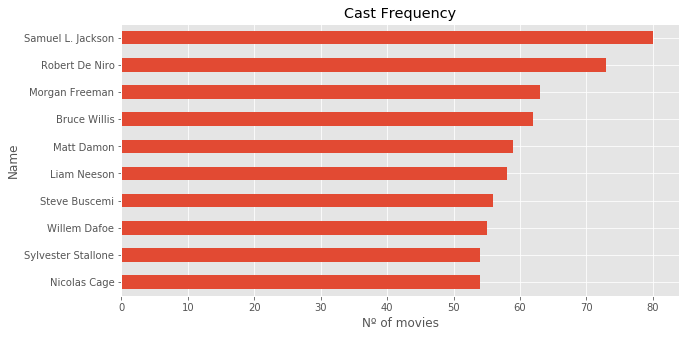

In [129]:
plt.subplots(figsize = (10, 5))

ax = df_cast.set_index("Name")["N_Movies"].sort_values(ascending = True)[-10:].plot.barh()
ax.set_xlabel("Nº of movies")
ax.set_title("Cast Frequency") 

plt.show()

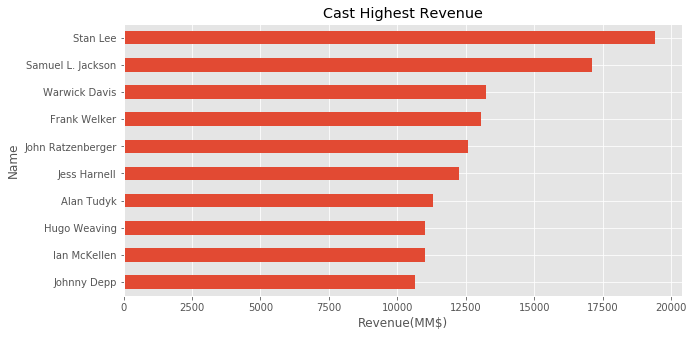

In [130]:
plt.subplots(figsize = (10, 5))

ax = (df_cast.set_index("Name")["Revenue"]).sort_values(ascending = True)[-10:].plot.barh()
ax.set_xlabel("Revenue(MM$)")
ax.set_title("Cast Highest Revenue") 

plt.show()

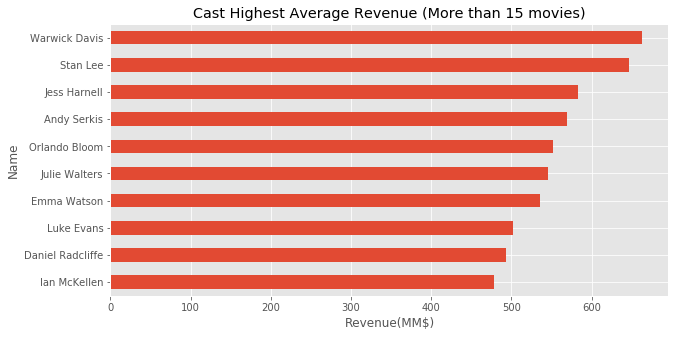

In [131]:
plt.subplots(figsize = (10, 5))

ax = (df_cast[df_cast["N_Movies"] > 15].set_index("Name")["Average_Revenue"]).sort_values(ascending = True)[-10:].plot.barh()
ax.set_xlabel("Revenue(MM$)")
ax.set_title("Cast Highest Average Revenue (More than 15 movies)") 

plt.show()

Let's see the same plots but only taking into account the 4 main protagonist of the movie

In [132]:
def word_count2(dataframe, ref_variable):
    values_list = []
    
    for elements_list in dataframe[ref_variable]:
        for value in elements_list[:4]:
            values_list.append(value)
    
    return collections.Counter(values_list)

In [133]:
cast_counter = word_count2(df, "cast_names")
cast_list = np.array(list(cast_counter.keys()))
cast_list_count = np.array(list(cast_counter.values()))

cast_dict_revenue = {}
for index, artists_list in enumerate(df["cast_names"]):
    for artist in artists_list[:4]:
        if artist not in cast_dict_revenue:
            cast_dict_revenue[artist] = df.get_value(index, "revenue")
        else:
            cast_dict_revenue[artist] = cast_dict_revenue[artist] + df.get_value(index, "revenue")

cast_list_revenue = np.array(list(cast_dict_revenue.values()))

df_cast_main = pd.DataFrame(
    {"Name": cast_list,
     "N_Movies": cast_list_count,
     "Revenue": cast_list_revenue / 1e6,
     "Average_Revenue": (cast_list_revenue / cast_list_count) / 1e6}
)

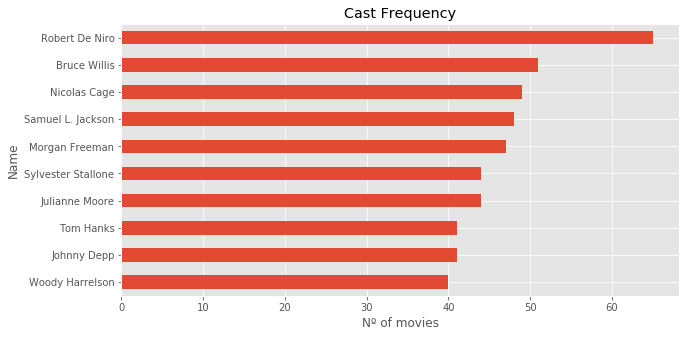

In [134]:
plt.subplots(figsize = (10, 5))

ax = df_cast_main.set_index("Name")["N_Movies"].sort_values(ascending = True)[-10:].plot.barh()
ax.set_xlabel("Nº of movies")
ax.set_title("Cast Frequency") 

plt.show()

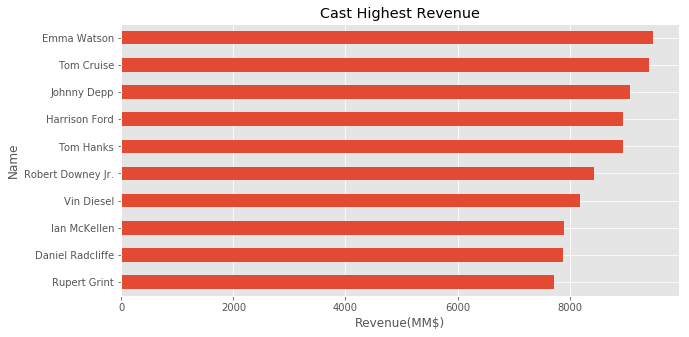

In [135]:
plt.subplots(figsize = (10, 5))

ax = (df_cast_main.set_index("Name")["Revenue"]).sort_values(ascending = True)[-10:].plot.barh()
ax.set_xlabel("Revenue(MM$)")
ax.set_title("Cast Highest Revenue") 

plt.show()

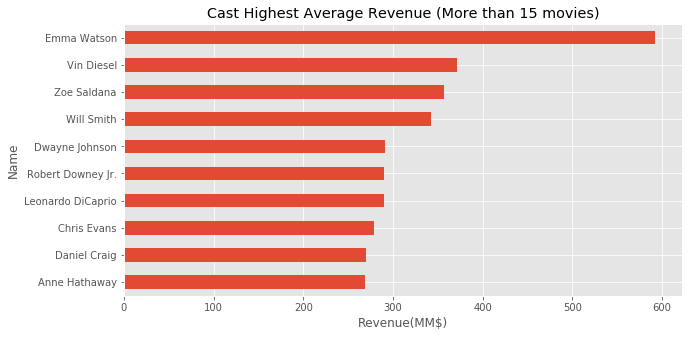

In [136]:
plt.subplots(figsize = (10, 5))

ax = (df_cast_main[df_cast_main["N_Movies"] > 15].set_index("Name")["Average_Revenue"]).sort_values(ascending = True)[-10:].plot.barh()
ax.set_xlabel("Revenue(MM$)")
ax.set_title("Cast Highest Average Revenue (More than 15 movies)") 

plt.show()

We see that the plots are different, so clearly the order of the actors in a film is related to the revenue. It is not the same to have certain actors among the 4 main roles.

We also see that most of these actors with the highest average revenue are actors that belong to a franchise (for example: Harry Potter, The Fast and the Furious, Marvel).

In order to build our model, we have seen that it can be useful to take into account:
* The length of the cast.
* Number of men and women in the cast.
* Who are the 4 main actors.

In [137]:
df[df["cast"].str.len() == 0].shape

(0, 17)

In [138]:
df = df.drop(["cast"], axis = 1)

In [139]:
df = df.drop(["cast_order"], axis = 1)

### 13. Crew

In [140]:
df["crew"][0][0:1000]

"[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter', 'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'}, {'credit_id': '52fe4284c3a36847f8024f4f', 'department': 'Writing', 'gender': 2, 'id': 12891, 'job': 'Screenplay', 'name': 'Joss Whedon', 'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'}, {'credit_id': '52fe4284c3a36847f8024f55', 'department': 'Writing', 'gender': 2, 'id': 7, 'job': 'Screenplay', 'name': 'Andrew Stanton', 'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'}, {'credit_id': '52fe4284c3a36847f8024f5b', 'department': 'Writing', 'gender': 2, 'id': 12892, 'job': 'Screenplay', 'name': 'Joel Cohen', 'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'}, {'credit_id': '52fe4284c3a36847f8024f61', 'department': 'Writing', 'gender': 0, 'id': 12893, 'job': 'Screenplay', 'name': 'Alec Sokolow', 'profile_path': '/v79vlRYi94BZUQnkkyznbGUZLjT.jpg'}, {'credit_id': '52fe4284c3a36847f8024f67', 'depar

In this case we don't know the keys we want as we did in the cast column. For this reason, we have first to convert this column into a list of dictionaries and see more deeply what we have.

In [141]:
df = to_dict(df, "crew")

In [142]:
df["crew"][0][0:2]

[{'credit_id': '52fe4284c3a36847f8024f49',
  'department': 'Directing',
  'gender': 2,
  'id': 7879,
  'job': 'Director',
  'name': 'John Lasseter',
  'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f4f',
  'department': 'Writing',
  'gender': 2,
  'id': 12891,
  'job': 'Screenplay',
  'name': 'Joss Whedon',
  'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'}]

As we see, there are several departments and different jobs per department with the information of the person. In a first instance, we will focus on obtaining the name of the director, producer and scriptwriter because we think they may have something to do with the revenue.

So, first step is to check how many departments are and see the diferent jobs per department.
<br>
For this task we will create a dictionary in which the key will be the department and the values will be the diferent jobs.

In [143]:
departments_dict = {}

for i in df["crew"]:   
    for j in range(len(i)): 
        
        department = list(filter(lambda item: item[0] == "department", i[j].items()))[0][1]
        job = list(filter(lambda item: item[0] == "job", i[j].items()))[0][1]
        
        if department not in departments_dict:
            departments_dict[department] = [job]
            
        else:
            if job not in departments_dict[department]:
                departments_dict[department] += [job]

How many jobs are per department?

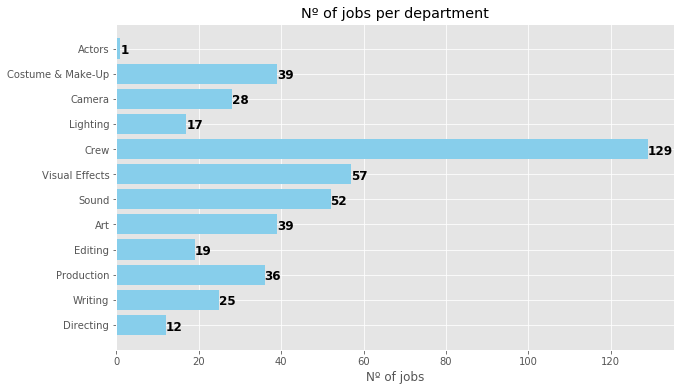

In [144]:
fig, ax = plt.subplots(figsize = (10, 6))

values = list(map(lambda value: len(value), departments_dict.values()))
departments = list(departments_dict.keys())
y_pos = np.arange(len(departments))

ax.barh(y_pos, values, color = "skyblue")
ax.set_yticks(y_pos)
ax.set_yticklabels(departments)

for i, v in enumerate(values):
    ax.text(v, i - 0.2, str(v), fontsize = 12, color = "black", weight = "bold")

ax.set_xlabel("Nº of jobs")
ax.set_title("Nº of jobs per department")    
    
plt.show()

Let's see the different jobs in the departments: Production, Writing and Directing

In [145]:
for department in ["Production", "Writing", "Directing"]:
    print(department + "\n", departments_dict[department],"\n")

Production
 ['Producer', 'Executive Producer', 'Production Supervisor', 'Production Coordinator', 'Casting Consultant', 'ADR Voice Casting', 'Casting', 'Associate Producer', 'Unit Production Manager', 'Casting Associate', 'Co-Producer', 'Location Manager', 'Production Accountant', 'Production Manager', 'Line Producer', 'Assistant Production Manager', 'Casting Assistant', 'Local Casting', 'Finance', 'Co-Executive Producer', 'Executive In Charge Of Post Production', 'Executive In Charge Of Production', 'Publicist', 'Unit Manager', 'Production Office Coordinator', 'Other', 'Assistant Production Coordinator', 'Character Technical Supervisor', 'Researcher', 'Executive Consultant', 'Administration', 'Supervising Producer', 'Script Researcher', 'Production Director', 'Development Manager', 'Consulting Producer'] 

Writing
 ['Screenplay', 'Original Story', 'Novel', 'Characters', 'Story', 'Writer', 'Author', 'Storyboard', 'Scenario Writer', 'Theatre Play', 'Screenstory', 'Book', 'Other', 'Adapt

We extract the data that we consider relevant from a movie:
- Director name (department Directing --> job Director)
- Producer name (department Production --> job Producer)
- Screenplay name (department Writing --> job Screenplay)

In [146]:
# This code is using list comprehension 
# We go through the crew column and extract the required information

producer_df = [[i[j]["name"] for j in range(len(i)) 
                if i[j]["department"] == "Production" and i[j]["job"] == "Producer"] 
                for i in df["crew"]]

director_df = [[i[j]["name"] for j in range(len(i)) 
                if i[j]["department"] == "Directing" and i[j]["job"] == "Director"] 
                for i in df["crew"]]

screenplay_df = [[i[j]["name"] for j in range(len(i)) 
                 if i[j]["department"] == "Writing" and i[j]["job"] == "Screenplay"] 
                 for i in df["crew"]]

In [147]:
print(producer_df[:4])
print(director_df[:4])
print(screenplay_df[:4])

[['Bonnie Arnold', 'Ralph Guggenheim'], ['Scott Kroopf', 'William Teitler'], ['Ronald Bass', 'Ezra Swerdlow', 'Deborah Schindler', 'Caron K'], ['Nancy Meyers']]
[['John Lasseter'], ['Joe Johnston'], ['Forest Whitaker'], ['Charles Shyer']]
[['Joss Whedon', 'Andrew Stanton', 'Joel Cohen', 'Alec Sokolow'], ['Jonathan Hensleigh', 'Greg Taylor', 'Jim Strain'], ['Ronald Bass', 'Terry McMillan'], ['Nancy Meyers', 'Albert Hackett']]


Introduce in the Data Frame and remove the crew original column

In [148]:
# Remove originals cast and crew columns
df.drop("crew", axis = 1, inplace = True)

# Creation new columns
df["Director"] = pd.Series(director_df).values
df["Producer"] = pd.Series(producer_df).values
df["Screenplay"] = pd.Series(screenplay_df).values

In [149]:
df.head(3)

,belongs_to_collection,budget,genres,original_language,production_companies,revenue,runtime,title,keywords,release_year,release_month,release_weekday,cast_names,cast_gender,Director,Producer,Screenplay
0,Toy Story Collection,30000000.0,"[Animation, Comedy, Family]",en,[Pixar Animation Studios],373554033.0,81.0,Toy Story,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",1995.0,10.0,0.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2]",[John Lasseter],"[Bonnie Arnold, Ralph Guggenheim]","[Joss Whedon, Andrew Stanton, Joel Cohen, Alec..."
1,NaN,65000000.0,"[Adventure, Fantasy, Family]",en,"[TriStar Pictures, Teitler Film, Interscope Co...",262797249.0,104.0,Jumanji,"[{'id': 10090, 'name': 'board game'}, {'id': 1...",1995.0,12.0,4.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, ...",[Joe Johnston],"[Scott Kroopf, William Teitler]","[Jonathan Hensleigh, Greg Taylor, Jim Strain]"
2,NaN,16000000.0,"[Comedy, Drama, Romance]",en,[Twentieth Century Fox Film Corporation],81452156.0,127.0,Waiting to Exhale,"[{'id': 818, 'name': 'based on novel'}, {'id':...",1995.0,12.0,4.0,"[Whitney Houston, Angela Bassett, Loretta Devi...","[1, 1, 1, 1, 2, 2, 2, 2, 2, 2]",[Forest Whitaker],"[Ronald Bass, Ezra Swerdlow, Deborah Schindler...","[Ronald Bass, Terry McMillan]"


In [150]:
df[df["Director"].str.len() == 0].shape

(14, 17)

In [151]:
df[df["Producer"].str.len() == 0].shape

(1576, 17)

In [152]:
df[df["Screenplay"].str.len() == 0].shape

(3019, 17)

It is important to know that we have 14 movies with no Director, 1576 movies with no Producer, and 3019 movies with no Screenplay

It could be interesting to analyze if the length of all the crew influences the revenue, but we consider that it is an impractical information when it comes to predicting a new movie. However, we could analyze if the collection of a film changes depending on whether there is one or more directors.

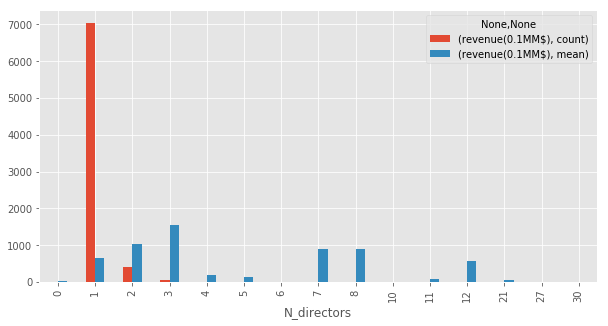

In [153]:
pd.DataFrame(
    {"revenue(0.1MM$)": df["revenue"] / 100000,
     "N_directors": [len(x) for x in df["Director"]]}
).groupby("N_directors").agg(["count", "mean"]).plot.bar(figsize = (10, 5));

We see that most films have a single director and that the number of films with more than one director is not significant enough to say that the revenue depends on it.

Now let's see who are the directors, producers and scriptwriters with the highest average collection

#### Directors 

In [154]:
director_counter = word_count(df, "Director")
director_list = np.array(list(director_counter.keys()))
director_list_count = np.array(list(director_counter.values()))

director_dict_revenue = {}
for index, artists_list in enumerate(df["Director"]):
    for director in artists_list:
        if director not in director_dict_revenue:
            director_dict_revenue[director] = df.get_value(index, "revenue")
        else:
            director_dict_revenue[director] = director_dict_revenue[director] + df.get_value(index, "revenue")

director_list_revenue = np.array(list(director_dict_revenue.values()))

df_director = pd.DataFrame(
    {"Name": director_list,
     "N_Movies": director_list_count,
     "Revenue": director_list_revenue / 1e6,
     "Average_Revenue": (director_list_revenue / director_list_count) / 1e6}
)

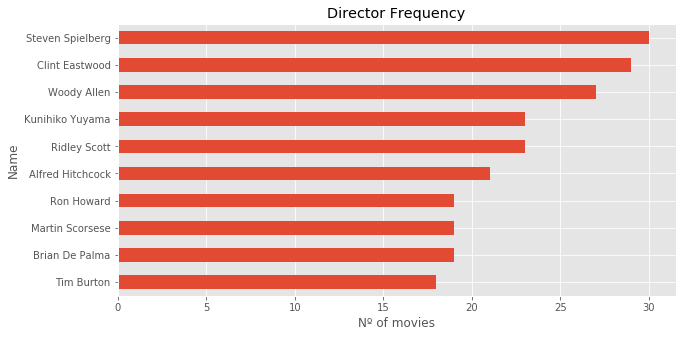

In [155]:
plt.subplots(figsize = (10, 5))

ax = df_director.set_index("Name")["N_Movies"].sort_values(ascending = True)[-10:].plot.barh()
ax.set_xlabel("Nº of movies")
ax.set_title("Director Frequency") 

plt.show()

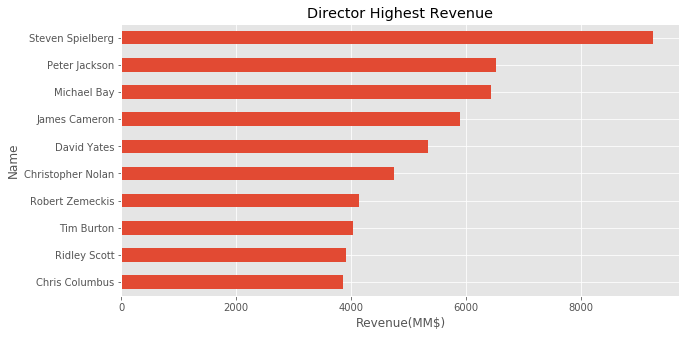

In [156]:
plt.subplots(figsize = (10, 5))

ax = (df_director.set_index("Name")["Revenue"]).sort_values(ascending = True)[-10:].plot.barh()
ax.set_xlabel("Revenue(MM$)")
ax.set_title("Director Highest Revenue") 

plt.show()

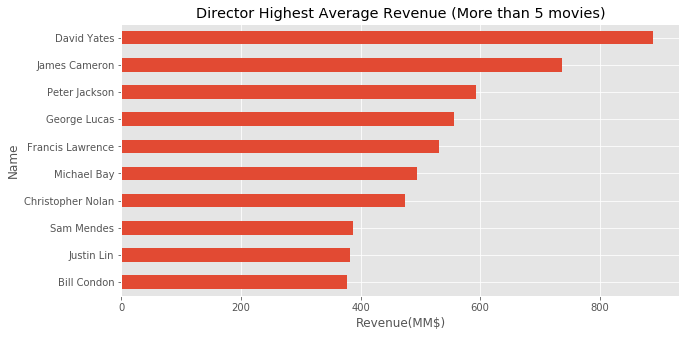

In [157]:
plt.subplots(figsize = (10, 5))

ax = (df_director[df_director["N_Movies"] > 5].set_index("Name")["Average_Revenue"]).sort_values(ascending = True)[-10:].plot.barh()
ax.set_xlabel("Revenue(MM$)")
ax.set_title("Director Highest Average Revenue (More than 5 movies)") 

plt.show()

#### Producers

In [158]:
producer_counter = word_count(df, "Producer")
producer_list = np.array(list(producer_counter.keys()))
producer_list_count = np.array(list(producer_counter.values()))

producer_dict_revenue = {}
for index, artists_list in enumerate(df["Producer"]):
    for producer in artists_list:
        if producer not in producer_dict_revenue:
            producer_dict_revenue[producer] = df.get_value(index, "revenue")
        else:
            producer_dict_revenue[producer] = producer_dict_revenue[producer] + df.get_value(index, "revenue")

producer_list_revenue = np.array(list(producer_dict_revenue.values()))

df_producer = pd.DataFrame(
    {"Name": producer_list,
     "N_Movies": producer_list_count,
     "Revenue": producer_list_revenue / 1e6,
     "Average_Revenue": (producer_list_revenue / producer_list_count) / 1e6}
)

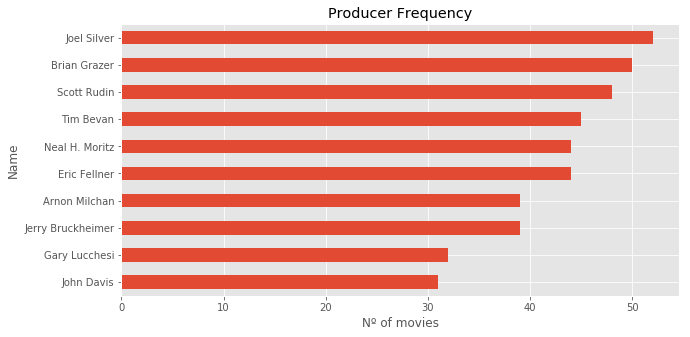

In [159]:
plt.subplots(figsize = (10, 5))

ax = df_producer.set_index("Name")["N_Movies"].sort_values(ascending = True)[-10:].plot.barh()
ax.set_xlabel("Nº of movies")
ax.set_title("Producer Frequency") 

plt.show()

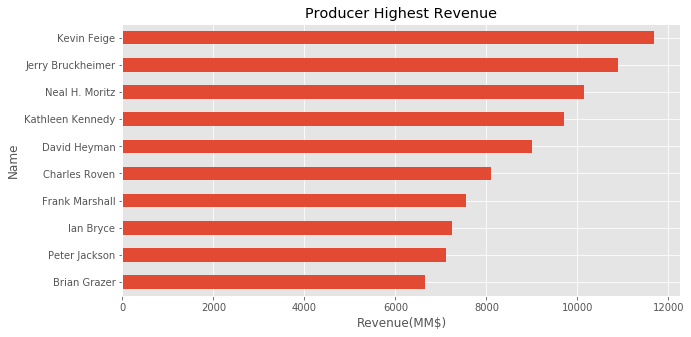

In [160]:
plt.subplots(figsize = (10, 5))

ax = (df_producer.set_index("Name")["Revenue"]).sort_values(ascending = True)[-10:].plot.barh()
ax.set_xlabel("Revenue(MM$)")
ax.set_title("Producer Highest Revenue") 

plt.show()

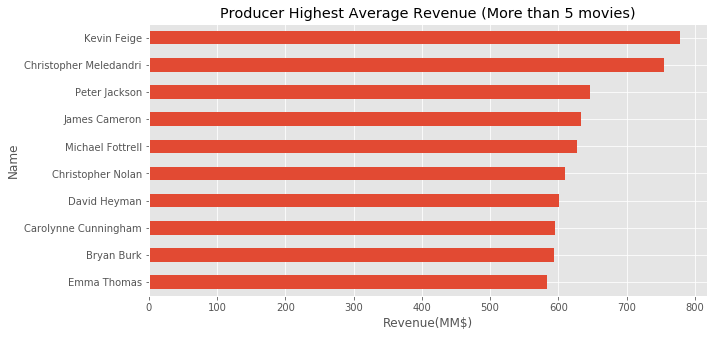

In [161]:
plt.subplots(figsize = (10, 5))

ax = (df_producer[df_producer["N_Movies"] > 5].set_index("Name")["Average_Revenue"]).sort_values(ascending = True)[-10:].plot.barh()
ax.set_xlabel("Revenue(MM$)")
ax.set_title("Producer Highest Average Revenue (More than 5 movies)") 

plt.show()

#### Screenwriters

In [162]:
screenplay_counter = word_count(df, "Screenplay")
screenplay_list = np.array(list(screenplay_counter.keys()))
screenplay_list_count = np.array(list(screenplay_counter.values()))

screenplay_dict_revenue = {}
for index, artists_list in enumerate(df["Screenplay"]):
    for screenplay in artists_list:
        if screenplay not in screenplay_dict_revenue:
            screenplay_dict_revenue[screenplay] = df.get_value(index, "revenue")
        else:
            screenplay_dict_revenue[screenplay] = screenplay_dict_revenue[screenplay] + df.get_value(index, "revenue")

screenplay_list_revenue = np.array(list(screenplay_dict_revenue.values()))

df_screenplay = pd.DataFrame(
    {"Name": screenplay_list,
     "N_Movies": screenplay_list_count,
     "Revenue": screenplay_list_revenue / 1e6,
     "Average_Revenue": (screenplay_list_revenue / screenplay_list_count) / 1e6}
)

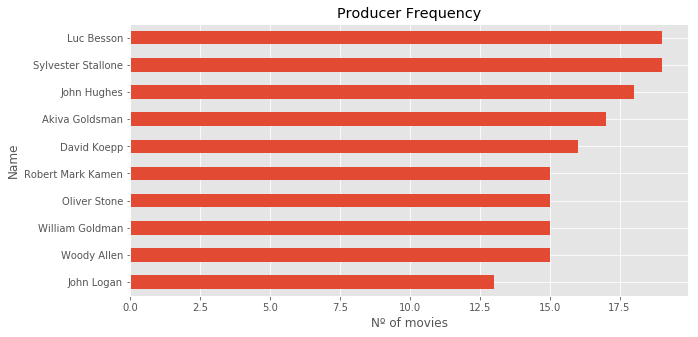

In [163]:
plt.subplots(figsize = (10, 5))

ax = df_screenplay.set_index("Name")["N_Movies"].sort_values(ascending = True)[-10:].plot.barh()
ax.set_xlabel("Nº of movies")
ax.set_title("Producer Frequency") 

plt.show()

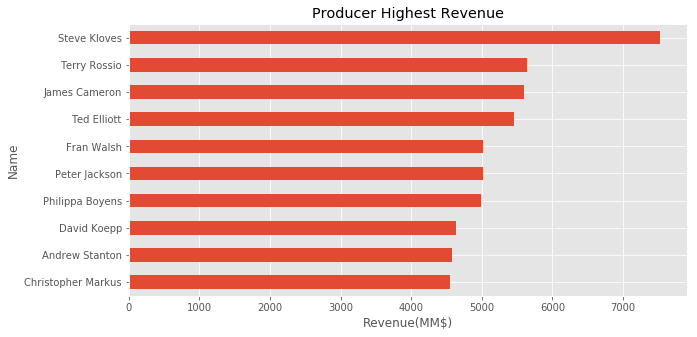

In [164]:
plt.subplots(figsize = (10, 5))

ax = (df_screenplay.set_index("Name")["Revenue"]).sort_values(ascending = True)[-10:].plot.barh()
ax.set_xlabel("Revenue(MM$)")
ax.set_title("Producer Highest Revenue") 

plt.show()

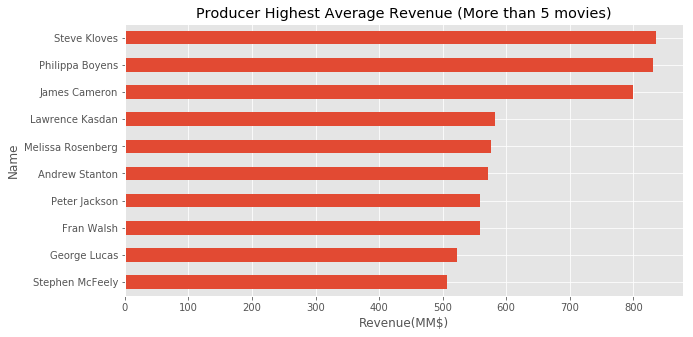

In [165]:
plt.subplots(figsize = (10, 5))

ax = (df_screenplay[df_screenplay["N_Movies"] > 5].set_index("Name")["Average_Revenue"]).sort_values(ascending = True)[-10:].plot.barh()
ax.set_xlabel("Revenue(MM$)")
ax.set_title("Producer Highest Average Revenue (More than 5 movies)") 

plt.show()

Significant names that we see influence the collection of a film:
* Directors: David Yates, James Cameron, Peter Jackson, George Lucas.
* Producers: Kevin Feige, Christopher Meledandri, Peter Jackson, James Cameron.
* Screenwriters: Steve Kloves, Philippa Boyens, James Cameron, Lawrence Kasdan.

Again, they are names related to franchises:
* Harry Potter: David Yates, Steve Kloves
* The Lord of The Rings: Peter Jackson, Philippa Boyens
* Star Wars: George Lucas, Lawrence Kasdan
* Despicable Me: Christopher Meledandri
* Avatar: James Cameron
* Marvel: Steve Kloves

As same with the cast, for our model we will consider if the director, producer, scriptwriter is among a group of people that influence more in the revenue of a film.

### 14. Keywords

In [166]:
df["keywords"][0]

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

List of dicts ---> transform

In [167]:
df["keywords"] = to_list(df["keywords"], "name")

In [168]:
df["keywords"].head()

0    [jealousy, toy, boy, friendship, friends, riva...
1    [board game, disappearance, based on children'...
2    [based on novel, interracial relationship, sin...
3    [baby, midlife crisis, confidence, aging, daug...
4    [robbery, detective, bank, obsession, chase, s...
Name: keywords, dtype: object

We are going to analyze two things:
* The number of keywords in a film influences the revenue?
* What are the keywords that average more revenue?

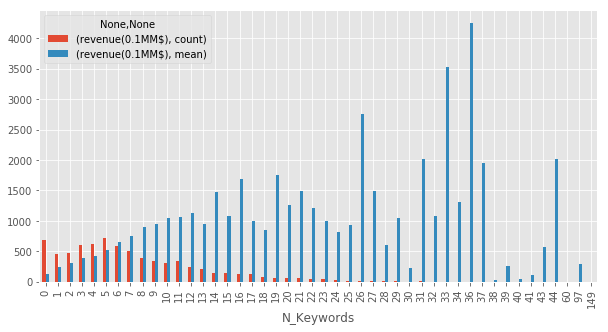

In [169]:
pd.DataFrame(
    {"revenue(0.1MM$)": df["revenue"] / 100000,
     "N_Keywords": [len(x) for x in df["keywords"]]}
).groupby("N_Keywords").agg(["count", "mean"]).plot.bar(figsize = (10, 5));

We see that most movies have between 0 and 10 keywords. We also see that there is a tendency for revenue to increase as the number of keywords increases up to 12.

In [170]:
keywords_counter = word_count(df, "keywords")
keywords_list = np.array(list(keywords_counter.keys()))
keywords_list_count = np.array(list(keywords_counter.values()))

keywords_dict_revenue = {}
for index, artists_list in enumerate(df["keywords"]):
    for keywords in artists_list:
        if keywords not in keywords_dict_revenue:
            keywords_dict_revenue[keywords] = df.get_value(index, "revenue")
        else:
            keywords_dict_revenue[keywords] = keywords_dict_revenue[keywords] + df.get_value(index, "revenue")

keywords_list_revenue = np.array(list(keywords_dict_revenue.values()))

df_keywords = pd.DataFrame(
    {"Name": keywords_list,
     "N_Movies": keywords_list_count,
     "Revenue": keywords_list_revenue / 1e6,
     "Average_Revenue": (keywords_list_revenue / keywords_list_count) / 1e6}
)

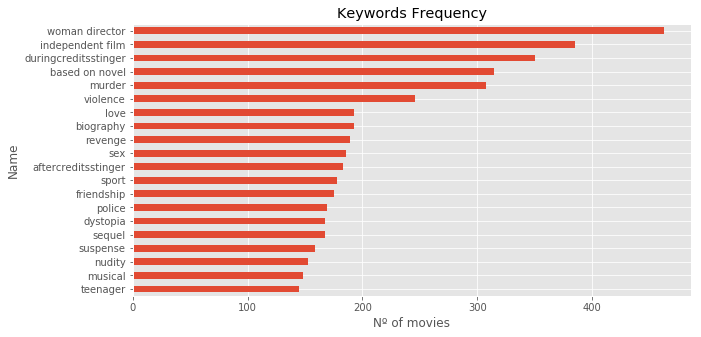

In [171]:
plt.subplots(figsize = (10, 5))

ax = df_keywords.set_index("Name")["N_Movies"].sort_values(ascending = True)[-20:].plot.barh()
ax.set_xlabel("Nº of movies")
ax.set_title("Keywords Frequency") 

plt.show()

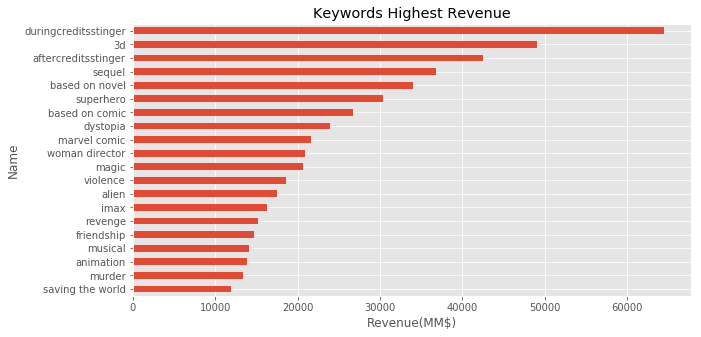

In [172]:
plt.subplots(figsize = (10, 5))

ax = (df_keywords.set_index("Name")["Revenue"]).sort_values(ascending = True)[-20:].plot.barh()
ax.set_xlabel("Revenue(MM$)")
ax.set_title("Keywords Highest Revenue") 

plt.show()

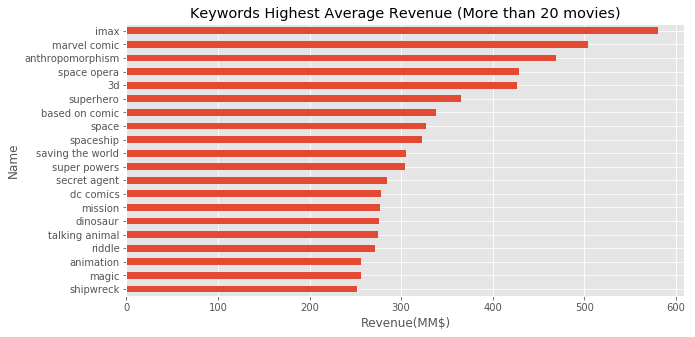

In [173]:
plt.subplots(figsize = (10, 5))

ax = (df_keywords[df_keywords["N_Movies"] > 20].set_index("Name")["Average_Revenue"]).sort_values(ascending = True)[-20:].plot.barh()
ax.set_xlabel("Revenue(MM$)")
ax.set_title("Keywords Highest Average Revenue (More than 20 movies)") 

plt.show()

About the most average revenue keywords, we find several types:
* Related to superhero movies: comic marvel, superhero, based on comic, super powers, dc comics.
* Related to the genre of the movie: space opera, animation, riddle, animal talking (animation), anthropomorphism (animation), shipwreck.
* Related to franchises: marvel, space, spaceship, dc comics, dinosaur, magic.
* Related to the format of the movie: imax, 3d

For the model we will consider what type of keywords it contains and if it belongs to a group that is related to a high revenue.

In [174]:
df[df["keywords"].str.len() == 0].shape

(691, 17)

There are 691 records with no keywords

#### Data Frame cleaned

In [175]:
df.head(3)

,belongs_to_collection,budget,genres,original_language,production_companies,revenue,runtime,title,keywords,release_year,release_month,release_weekday,cast_names,cast_gender,Director,Producer,Screenplay
0,Toy Story Collection,30000000.0,"[Animation, Comedy, Family]",en,[Pixar Animation Studios],373554033.0,81.0,Toy Story,"[jealousy, toy, boy, friendship, friends, riva...",1995.0,10.0,0.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2]",[John Lasseter],"[Bonnie Arnold, Ralph Guggenheim]","[Joss Whedon, Andrew Stanton, Joel Cohen, Alec..."
1,NaN,65000000.0,"[Adventure, Fantasy, Family]",en,"[TriStar Pictures, Teitler Film, Interscope Co...",262797249.0,104.0,Jumanji,"[board game, disappearance, based on children'...",1995.0,12.0,4.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, ...",[Joe Johnston],"[Scott Kroopf, William Teitler]","[Jonathan Hensleigh, Greg Taylor, Jim Strain]"
2,NaN,16000000.0,"[Comedy, Drama, Romance]",en,[Twentieth Century Fox Film Corporation],81452156.0,127.0,Waiting to Exhale,"[based on novel, interracial relationship, sin...",1995.0,12.0,4.0,"[Whitney Houston, Angela Bassett, Loretta Devi...","[1, 1, 1, 1, 2, 2, 2, 2, 2, 2]",[Forest Whitaker],"[Ronald Bass, Ezra Swerdlow, Deborah Schindler...","[Ronald Bass, Terry McMillan]"


In [176]:
df.shape

(7537, 17)